# Data repository for Network Analysis of Energy Futures
## Article Title: Visualizing different perspectives in energy scenarios
## Authors: Jude H. Kurniawan (University of Waterloo), Vanessa Schweizer (University of Waterloo)

Repository: https://github.com/judekurn/energy-futures/blob/master/Energyfutures-Ver2.ipynb

### Abstract:
Studies of energy futures have been garnering attention because they could provide the bird’s eye view of the landscape and the roadmaps toward low-carbon energy transitions (Geels et al., 2016; Rogelj et al. 2016). However, different organizations often conduct and commission energy futures studies independently and may unknowingly influence scenario outcomes to be aligned with the organizations’ perspectives—hence, stories told by different scenarios can be quite different. Insofar, research has rarely examined ways to ‘harmonize’ different scenarios, let alone ‘stitching’ them all together for producing a wider perspective of energy futures (Zurek and Henrich, 2006; Schweizer and Kurniawan, 2016). Here we apply social network analysis to visualize different perspectives of four Canadian energy futures studies and one word energy scenarios developed by different organizations. We find that certain studies have narrow perspective and appear to align with either the pro-economics or pro-environmentalism perspectives. To harmonize these different perspectives, we analyze by visualizing all scenario elements and their interrelationship derived from individual studies. We observe relational patterns underneath the complex surface for how different energy futures studies interrelate. We found that low-carbon energy transition at the global scale is highly dependent on the establishment of low-carbon governance, institutions and technology development. Interestingly, at the country-level such as Canada, low-carbon governance is not the fundamental driver; instead, Canada should be more concerned with issues related to mass consumption, transportation and freight. Our study suggests that understanding the country-specific fundamental driver of low-carbon energy transition will prevent us from ‘barking at the wrong trees.’

## Updates and Fixes
* 09 Aug 2018 - Remove unused codes and add comments
* 08 Aug 2018 - Updates area plots overshadowing clusters using Polygon patches
* 03 Aug 2018 - Fixed the problem with community detection producing inconsistent groups and groups membership


In [1]:
import csv
import networkx as nx
import pandas as pd
import community
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon
from seaborn import color_palette, set_style, palplot

In [6]:
import pkg_resources
print('Networkx Version: ',pkg_resources.get_distribution('networkx').version)
print('Pandas Version: ',pkg_resources.get_distribution('pandas').version)
print('Matplotlib Version: ',pkg_resources.get_distribution('matplotlib').version)

Networkx Version:  2.1
Pandas Version:  0.23.0
Matplotlib Version:  2.2.2


### Description of Edgelist.csv file
We subjected the five energy futures studies to qualitatative analysis (a.k.a. qualitative coding technique) to search and extract text stings or statements implying scenario elements influencing others in the future. These statements suggest interrelationships between two scenario elements. We put emphasis on the future, which means the statements decribing influences in the past would be ignored; statements indicating influences in the future would be incorporated into the dataset (Edgelist.csv). The dataset comprises a list of two scenario elements deemed to have an established relationship. In this study, the edges are non-directed influences because statements describing the interrelationship might not be explicit in indicating causations, instead they implied correlations.

In [7]:
se = pd.read_csv('./data/ES_edgelist.csv', sep=',')
se.head()

,node1,node2,report_name
0,Oil consumption,GHG Emissions (aggregate),Trottier
1,LNG consumption,GHG Emissions (aggregate),Trottier
2,Electricity consumption,GHG Emissions (aggregate),Trottier
3,Biofuels consumption,Oil consumption,Trottier
4,Oil consumption,GHG Emissions (aggregate),Trottier


We first load the compiled edgelist in .csv file into a pandas dataframe. The data has three columns, node1, node2, and report_name

In [8]:
#Seperating edgelist into different dataframes so that nodes/edges attributes can be manipulated individually
se4 = se.iloc[:192]
se_trot = se.iloc[:30]
se_deep = se.iloc[30:72]
se_neb = se.iloc[72:92]
se_rnrg = se.iloc[92:192]
se_wec = se.iloc[192:]

Subsequently, I create dataframe se4 for 4 energy futures studies related to Canada...excluding the global study conducted by WEC, and individual edgelist for each scenarios report. The reason for this is because I would like to produce invididual graphs for each report.

## Section 1: Network analysis to reveal relational pattern of energy futures studies for Canada
The graphs GSE (Graphs Scenarios Energy) are created using Networkx that imports edgelist from the pandas dataframes. Note that GSE5 is the graph that consists of 5 scenario reports (4 Canada and 1 World scenarios) and the GSE4 is a grpah for 4 Canada scenario reports. The GSE5 will become the overall 'layout' in this study while the *smaller* graphs (e.g. GSE4 and GSE_example) will be layered over the overall layout.

In [9]:
GSE5 = nx.from_pandas_edgelist(se,'node1','node2',edge_attr=True)
GSE4 = nx.from_pandas_edgelist(se4,'node1','node2',edge_attr=True)
GSE_wec = nx.from_pandas_edgelist(se_wec,'node1','node2',edge_attr=True)
GSE_trot = nx.from_pandas_edgelist(se_trot,'node1','node2',edge_attr=True)
GSE_deep = nx.from_pandas_edgelist(se_deep,'node1','node2',edge_attr=True)
GSE_neb = nx.from_pandas_edgelist(se_neb,'node1','node2',edge_attr=True)
GSE_rnrg = nx.from_pandas_edgelist(se_rnrg,'node1','node2',edge_attr=True)

## Five Energy Scenarios Reports
![wec-repcover](https://3.bp.blogspot.com/-wXSTz8mV_1w/W4RUZlfd8eI/AAAAAAAAAoM/gr86cPr28CM9s2qHoSaollrZfE254FuKgCLcBGAs/s1600/5repocover.png)

In [14]:
print ('5sce\n',nx.info(GSE5))
print ('\n4-CA\n',nx.info(GSE4))
print ('\nWEC\n',nx.info(GSE_wec))
print ('\nTEFP\n',nx.info(GSE_trot))
print ('\nDDPC\n',nx.info(GSE_deep))
print ('\nNEB\n',nx.info(GSE_neb))
print ('\nReenergizing\n',nx.info(GSE_rnrg))

5sce
 Name: 
Type: Graph
Number of nodes: 177
Number of edges: 245
Average degree:   2.7684

4-CA
 Name: 
Type: Graph
Number of nodes: 134
Number of edges: 181
Average degree:   2.7015

WEC
 Name: 
Type: Graph
Number of nodes: 51
Number of edges: 64
Average degree:   2.5098

TEFP
 Name: 
Type: Graph
Number of nodes: 27
Number of edges: 28
Average degree:   2.0741

DDPC
 Name: 
Type: Graph
Number of nodes: 41
Number of edges: 39
Average degree:   1.9024

NEB
 Name: 
Type: Graph
Number of nodes: 18
Number of edges: 19
Average degree:   2.1111

Reenergizing
 Name: 
Type: Graph
Number of nodes: 95
Number of edges: 99
Average degree:   2.0842


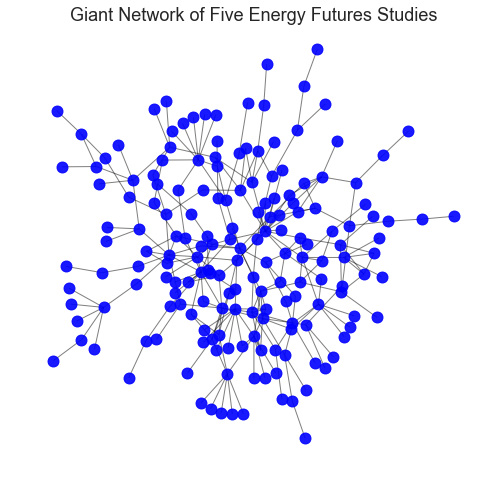

In [7]:
layout = nx.kamada_kawai_layout(GSE5)
set_style('white')
plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('Giant Network of Five Energy Futures Studies',fontsize=18)
nx.draw_networkx_nodes(GSE5, layout, node_color='b', node_size=120, alpha=.9)
nx.draw_networkx_edges(GSE5, layout, edge_color='k',width=1, alpha=.5)

The figure shown below comprises of 4 sub-plots arranged in 2x2. I use the kamadi_kawai layout to obtain a fixed seed (the nodes location will not change when the figure is regenerated). The layout is based on GSE5 (5 scenarios) but I only plot the GSE4 (4 scenarios) because I want to show the perspective of one scenario against the Canada scenarios (that means 4 scenarios). The nodes/edges from individual report are plotted in blue against the backdrop of all nodes/edges for four Canada energy scenarios plotted in grey.

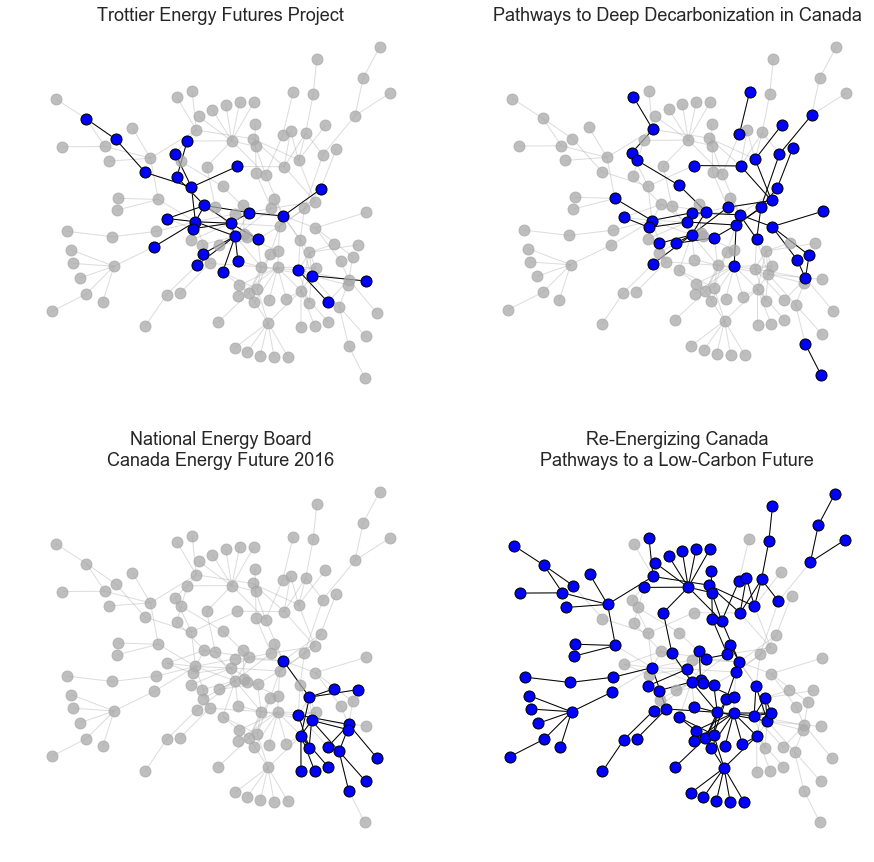

In [8]:
#customization lines for different studies
studytext1 = 'Trottier Energy Futures Project'
studytext2 = 'Re-Energizing Canada\nPathways to a Low-Carbon Future'
studytext3 = 'National Energy Board\nCanada Energy Future 2016'
studytext4 = 'Pathways to Deep Decarbonization in Canada'

# GSE5 is the base layout for all the graph plots
layout = nx.kamada_kawai_layout(GSE5)
set_style('white')
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.axis('off')
plt.title(studytext1,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_trot, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_trot, layout, edge_color='k',width=1)

plt.subplot(224)
plt.axis('off')
plt.title(studytext2,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_rnrg, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_rnrg, layout, edge_color='k',width=1)

plt.subplot(223)
plt.axis('off')
plt.title(studytext3,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_neb, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_neb, layout, edge_color='k',width=1)

plt.subplot(222)
plt.axis('off')
plt.title(studytext4,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_deep, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_deep, layout, edge_color='k',width=1)

plt.savefig('./figures/four_scenarios_comparison.pdf')
plt.savefig('./figures/four_scenarios_comparison.png')

The Trottier report covers a portion of the central theme (we will know this theme when we perform community detections in the next section). NEB report has a narrow perspective as can be seen from the relational pattern shown. The Deep Decarbonization report has a wider perspective than trottier, which is not surprising because Trottier scenarios are based on quantiative energy modelling which may limit the use of scenario elements, especially qualitative scenario elements that cannot be coupled to the models. Interestingly, the Deep Decabonization report seems to be 'mutually exclusive' with the NEB report. Of the four scenarios, the Re-Energizing Canada report are shown to have the broadest perspective.

In [9]:
print('The scenario elements or nodes in NEB report are: \n', GSE_neb.nodes())
print('The scenario elements or nodes in Deep Decarbonizations report are: \n', list(GSE_deep.nodes()))

The scenario elements or nodes in NEB report are: 
 ['Oil demand (global)', 'Oil prices (global)', 'LNG production (USA)', 'Oil sand production', 'LNG demand (USA/Canada)', 'LNG prices (global)', 'Population', 'GDP', 'USA Economy', 'Rise of China and Asia', 'Export', 'LNG infrastructures development', 'LNG production', 'Energy intensity', 'Developing countries GDP', 'Oil infrastructures development', 'LNG demand (USA)', 'LNG demand']
The scenario elements or nodes in Deep Decarbonizations report are: 
 ['Fuel switching', 'GHG Emissions (aggregate)', 'Renewable energy generation', 'Wind power production cost', 'Wind power generation', 'Solar power production cost', 'Solar power generation', 'Innovation capacity (global)', 'Banning coal/oil-fired generation', 'Carbon intensity', 'Gas-fired generation', 'LNG demand', 'New clean tech generation', 'Electricity generation', 'Electrification policy', 'Tech dev in renewable energy', 'GHG Emissions (building)', 'Adoption of EV', 'GHG Emissions 

From the list of nodes found in NEB and Deep Decarbonization reports, we observe that NEB report emphasizes issues related to economic development (energy demand and supply) of the resource extraction sector. There seems to be no nodes addressing environmental issue metnioned by the report. The Deep Decarbonization report, on the other hand, comprises of nodes related to the production of clean energy and addresses mostly environmental issues. Although the environmental issues are addressed extensively, the report appears to have missed the economic issues -- resource economic. Incorporating scenario elements related to resource economy is particular important for Canada since we cannot simply 'flick' the switch from carbon economy to decarbonized economy. We need to analyse how we can make the transition.

## Section 2: Network analysis to reveal relational pattern across scale (Canada/Global)
It will be interesting to observe how nergy futures in Canada correspond to global energy futures. Here, I use global energy scenario by World Energy Council (WEC) to find out how enery futures studies in Canada would stack up against the world energy scenarios.

### Extracting cross-scale nodes
There are nodes present in WEC studies that may be also present in one of the four Canadian energy studies. To capture these cross-scale nodes, I created a list of nodes derived from the set intersection between the nodes found in GSE4 and GSE_wec. From the list of nodes, I created a graph, GSE_xscale, which will be used lated to plot the graph.

In [10]:
ls1 = list(GSE4.nodes())
ls2 = list(GSE_wec.nodes())
ls3 = set(ls1).intersection(ls2)
GSE_xscale = nx.Graph()
for n in ls3:
    GSE_xscale.add_node(n)
#Note: I can also use the list of nodes and pass it to the networkx_draw functions in order to
#manipulate individual nodes attributes for visualization

I created another figure, this time it is comprised of three sub-plots. 

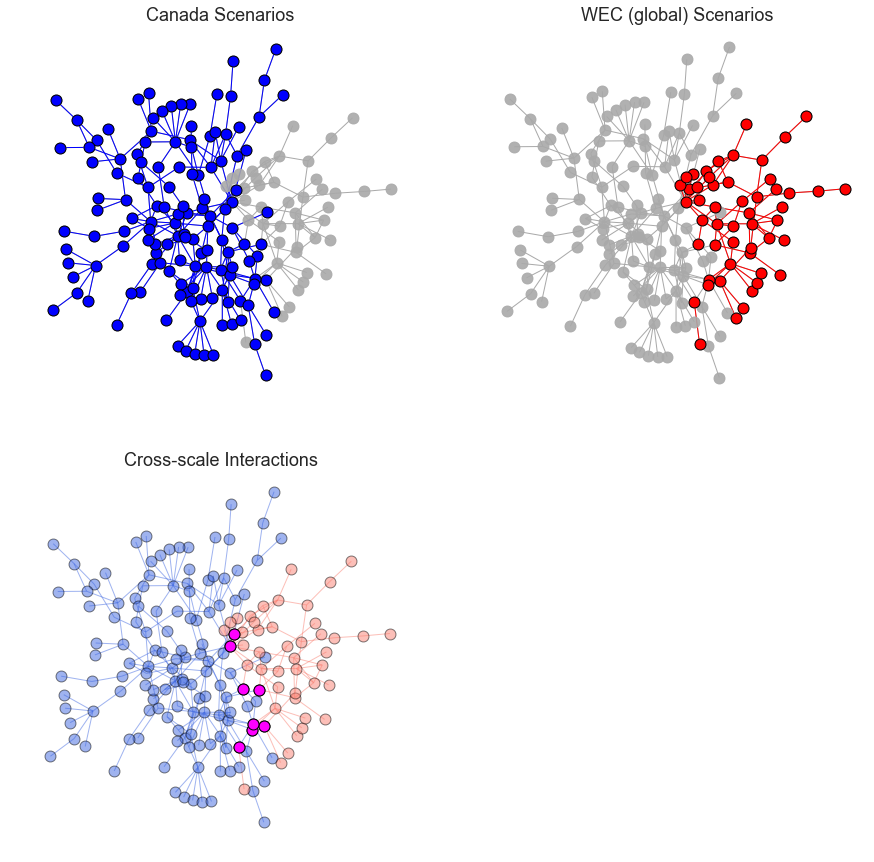

In [11]:
layout = nx.kamada_kawai_layout(GSE5)
set_style('white')
plt.figure(figsize=(15,15))
plt.axis('off')

plt.subplot(221)
plt.axis('off')
plt.title('Canada Scenarios',fontsize=18)
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgrey', node_size=120, alpha = .9)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgrey',width=1)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='b',width=1)

plt.subplot(222)
plt.axis('off')
plt.title('WEC (global) Scenarios',fontsize=18)
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgrey', node_size=120, alpha=.9)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgrey',width=1)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='r', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_wec, layout, edge_color='r',width=1)

plt.subplot(223)
plt.axis('off')
plt.title('Cross-scale Interactions',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='royalblue', node_size=120, edgecolors='k', alpha = .5)
nx.draw_networkx_edges(GSE4, layout, edge_color='royalblue',width=1, alpha = .5)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='salmon', node_size=120, edgecolors='k', alpha = .5)
nx.draw_networkx_edges(GSE_wec, layout, edge_color='salmon',width=1, alpha = .5)
nx.draw_networkx_nodes(GSE_xscale, layout, node_color='magenta', edgecolors='k',node_size=120)

plt.savefig('./figures/world_canada_comparison.pdf')
plt.savefig('./figures/world_canada_comparison.png')

The graph image shows the extent of scenario perspective between 4 Canada scenarios and WEC (global) scenarios. Pink dots are nodes that are present in Canada scenario reports as well as in the global WEC report. That means pink dots are the cross-scale interactions between local and global scenarios for this case.

In [12]:
GSE_xscale.node()

NodeView(('LNG demand (global)', 'LNG prices (global)', 'Developing countries GDP', 'Innovation capacity (global)', 'GHG reduction target', 'Oil prices (global)', 'Rise of China and Asia', 'Oil demand (global)'))

Closer examination of the cross-scale nodes, it appears that Canada energy futures are closely related to three global factors, which are the the global development (developing countries GDP, rise of China and Asia), global energy demand (LNG and oil demand, LNG and oil prices, GHG reduction target), and global innovation capacity.

Being the exporter of fossil fuel resources, the driving factor for export of resources might be motivated by the growth in the developing countries that generates global demand for oil and gas. However, the global energy market could have a major influence on which and what energy resources would be extracted and eventually expoerted. This may explain the seggegration between oil and gas.

Another aspect is the cross-scale linkage for innovative capactiy. The relationship is not clear if the global innovative capacity would be having effects on the local energy futures or the other way. Although it also prudent to speculate that the increase in innovative capacity at the global level could influence how well Canada could transition to the low-carbon energy futures (hypothetical).

## Section 3: Ranking nodes' degree of influence
In this section, I will use two indices (Betweenness centrality and Eigenvector centrality) to visualize the degree of influence a node has on the entire network. But first, I extracted the 'giant' network components. That means this is the max (or biggest) sub-network ignoring the smaller networks that comprise of 2-4 nodes

**NOTE** This code " max(nx.connected_component_subgraphs(GSE4), key=len)" is causing erratic outcomes of community detection and the fixed randomstate for spring layout.
* giant4 = max(nx.connected_component_subgraphs(GSE4), key=len)

### Eigenvector and Betweenness centrality
The Eigenvector centrality : definitions and descriptions ...
The Betweenness centrality : definitions and descriptions ...

In [13]:
partition_ca = community.best_partition(GSE4, randomize=False)
modularity = community.modularity(partition_ca, GSE4)
print('Modularity:', modularity)

Modularity: 0.6840145294710173


In [14]:
# Calculate eigenvector and betweenness centraliites for Canada Network
eig = nx.eigenvector_centrality(GSE4)
bet = nx.betweenness_centrality(GSE4)

The calculated centrality indices are placed in a container dataframe called cent_df comprising of eig, bet and community. The community is to show how nodes from diff communities stack up

In [15]:
cent_df = pd.DataFrame.from_dict([eig, bet, partition_ca])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Eigenvector', 'Betweenness', 'Community']
cent_df['Community'] = cent_df['Community'].astype(int)
cent_df.to_csv('./data/centralities.csv')

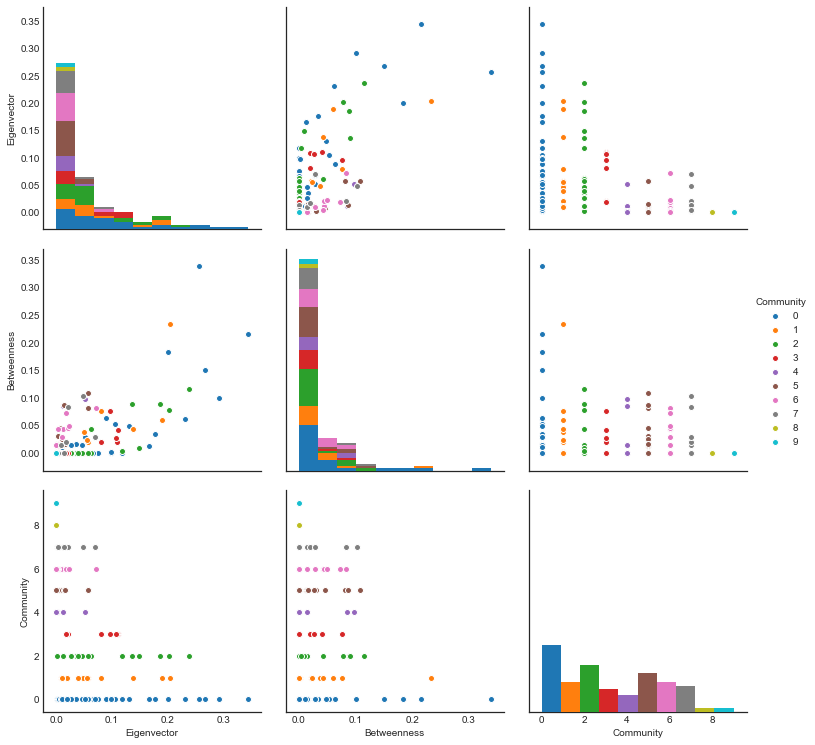

In [16]:
sns.pairplot(cent_df, hue = 'Community', size=3.5)
plt.savefig('./figures/centrality_scatterplot_matrix.pdf')

The community / eigenvector or betweenness scatterplots show that the nodes belong to the community group are quite evenly distributed. That means no group comprise only high betweenness or eigenvector. When eyeballing the eig/bet scatterplot, group 4 seems to be overrepresented by nodes with high eigenvector centrality scores.

In [17]:
cent_df.sort_values('Eigenvector',ascending=False).head(25)
#cent_df.sort_values('Betweenness',ascending=False).head(25)

,Eigenvector,Betweenness,Community
GHG Emissions (transport),0.344127,0.216002,0
Oil consumption,0.291998,0.100315,0
Trucking (heavy freight) load,0.267228,0.150394,0
GHG Emissions (aggregate),0.256534,0.339049,0
LNG production,0.237551,0.115559,2
Adoption of EV,0.231423,0.061744,0
Energy intensity,0.204339,0.233946,1
Export,0.202214,0.078317,2
Tech dev in energy storage,0.199930,0.183621,0
Oil sand production,0.189331,0.059576,1


I calculate the normalized score of both centralities  and use equal weightage to combine the two scores. Then I select the descriptors with the highest scores. I choose top 20 scores and excluded GHG Emission (aggregate) because this descriptor is too 'dilute' or it is a 'catch-all' descriptors that may not provide disaggregate information required for this study.

In [18]:
eig_norm = (cent_df['Eigenvector'] - min(cent_df['Eigenvector'])) / (max(cent_df['Eigenvector']) - min(cent_df['Eigenvector'])) * 0.5
bet_norm = (cent_df['Betweenness'] - min(cent_df['Betweenness'])) / (max(cent_df['Betweenness']) - min(cent_df['Betweenness'])) * 0.5
select_df = eig_norm + bet_norm
select_df = select_df.sort_values(ascending = False)
select_df.head(25)

GHG Emissions (aggregate)             0.872732
GHG Emissions (transport)             0.818541
Energy intensity                      0.641897
Trucking (heavy freight) load         0.610057
Oil consumption                       0.572195
Tech dev in energy storage            0.561277
LNG production                        0.515567
Adoption of EV                        0.427301
Export                                0.409303
GDP                                   0.401415
Oil sand production                   0.362947
Innovation capacity                   0.330048
Electricity consumption               0.308618
Tech dev in low carbon system         0.263264
Tech dev in green transport           0.260935
Biofuels production                   0.259107
Transition to decarbonized economy    0.252497
Renewable energy generation           0.242459
Biogas production                     0.230599
GHG Emissions (oil and gas)           0.228857
Labor force                           0.228785
Innovation ca

### Plotting degree of influence
First, I create a list that contains all nodes of the selected descriptor (20 nodes) excluding GHG Emission (aggregate). This list will be used to super impose on the plot to 'highlight' the selected nodes in the network.

In [19]:
select21_ls = select_df.index.values[:21].tolist()
select21_ls.remove('GHG Emissions (aggregate)') #this descriptor is removed from the selection
select21_ls

['GHG Emissions (transport)',
 'Energy intensity',
 'Trucking (heavy freight) load',
 'Oil consumption',
 'Tech dev in energy storage',
 'LNG production',
 'Adoption of EV',
 'Export',
 'GDP',
 'Oil sand production',
 'Innovation capacity',
 'Electricity consumption',
 'Tech dev in low carbon system',
 'Tech dev in green transport',
 'Biofuels production',
 'Transition to decarbonized economy',
 'Renewable energy generation',
 'Biogas production',
 'GHG Emissions (oil and gas)',
 'Labor force']

The above shows the list of **20 nodes** which will inform the next phase of the research that is to subject the these nodes to cross-impact balances analysis (see Weimer-Jehle 2006; Scwhweizer and Kurniawan 2016).

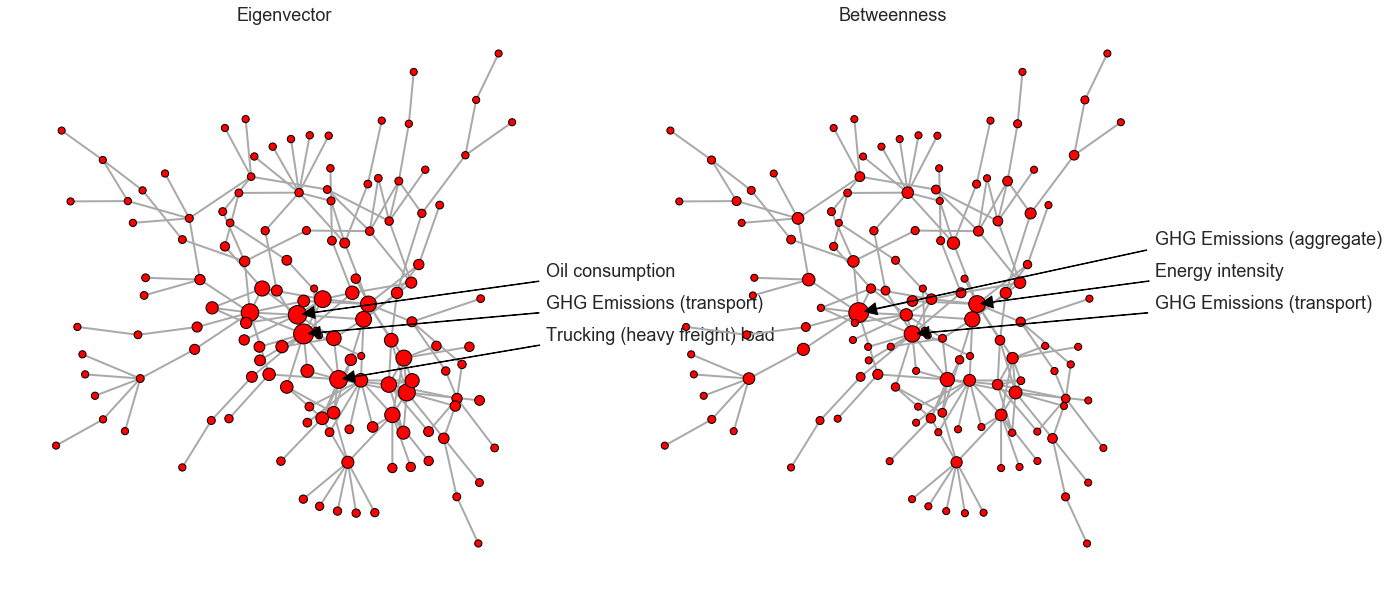

In [20]:
def noteLabel(descriptor,xy_text,myfontsize):
    x_loc,y_loc = layout[descriptor]
    xy_loc = (x_loc,y_loc)
    plt.annotate(descriptor,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.02, width=0.5),
        xytext=xy_text, fontsize=myfontsize)

eig_size = [50+1000*eig[n] for n in GSE4.nodes()]
bet_size = [50+1000*bet[n] for n in GSE4.nodes()]

my_fontsize = 18
layout = nx.kamada_kawai_layout(GSE5)
plt.figure(figsize=(20,10))
plt.axis('off')

plt.subplot(121)
plt.axis('off')
plt.title('Eigenvector',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='r', node_size=eig_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2)

noteLabel('GHG Emissions (transport)', (0.5,0), my_fontsize)
noteLabel('Oil consumption', (0.5,0.1), my_fontsize)
noteLabel('Trucking (heavy freight) load', (0.5,-0.1), my_fontsize)

plt.subplot(122)
plt.axis('off')
plt.title('Betweenness',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='r', node_size=bet_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2)

noteLabel('GHG Emissions (aggregate)', (0.5,0.2), my_fontsize)
noteLabel('Energy intensity', (0.5,0.1), my_fontsize)
noteLabel('GHG Emissions (transport)', (0.5,0), my_fontsize)

plt.savefig('./figures/centrality_graphplot.pdf')
plt.savefig('./figures/centrality_graphplot.png')

The figure above shows nodes with their sizes correspond to centrality scores

In [21]:
H = GSE4.subgraph(select21_ls)
for n in H.nodes():
    print (n,'is connected to', list(H.neighbors(n)))

Tech dev in energy storage is connected to ['GHG Emissions (oil and gas)', 'Oil consumption', 'Biofuels production', 'Innovation capacity', 'Energy intensity']
Transition to decarbonized economy is connected to ['GDP']
Trucking (heavy freight) load is connected to ['Oil sand production', 'LNG production', 'Biogas production', 'Biofuels production', 'GHG Emissions (transport)']
Biogas production is connected to ['Trucking (heavy freight) load']
Tech dev in low carbon system is connected to ['Energy intensity', 'GHG Emissions (oil and gas)', 'Oil sand production', 'LNG production']
Oil sand production is connected to ['Trucking (heavy freight) load', 'Labor force', 'Export', 'Tech dev in low carbon system']
Energy intensity is connected to ['Adoption of EV', 'Tech dev in low carbon system', 'Export', 'Tech dev in energy storage']
LNG production is connected to ['GDP', 'Trucking (heavy freight) load', 'Labor force', 'Export', 'Tech dev in low carbon system']
Oil consumption is connected t

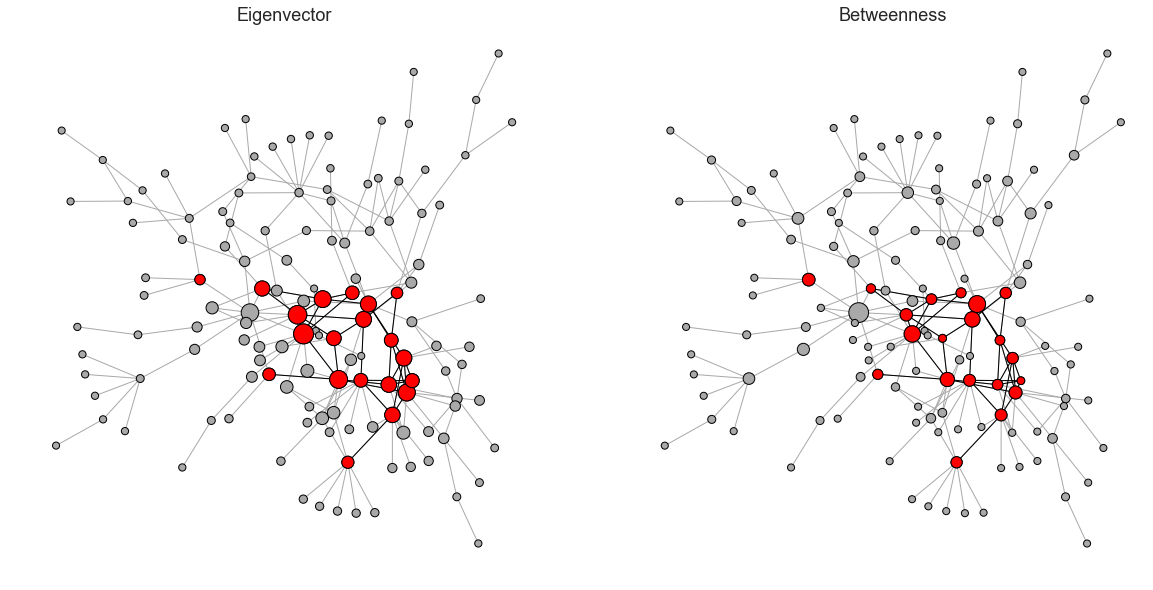

In [22]:
eigh_size = [50+1000*eig[n] for n in H.nodes()]
beth_size = [50+1000*bet[n] for n in H.nodes()]

layout = nx.kamada_kawai_layout(GSE5)
plt.figure(figsize=(20,10))
plt.axis('off')

plt.subplot(121)
plt.axis('off')
plt.title('Eigenvector',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgrey', node_size=eig_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=1)
nx.draw_networkx_nodes(H, layout, node_color='r', node_size=eigh_size, edgecolors='k')
nx.draw_networkx_edges(H, layout, edge_color='k', width=1)

plt.subplot(122)
plt.axis('off')
plt.title('Betweenness',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgrey', node_size=bet_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=1)
nx.draw_networkx_nodes(H, layout, node_color='r', node_size=beth_size, edgecolors='k')
nx.draw_networkx_edges(H, layout, edge_color='k', width=1)

plt.savefig('./figures/centrality_graphplot_selectednodes.pdf')
plt.savefig('./figures/centrality_graphplot_selectednodes.png')

Figure above shows the selected nodes in the networkd with respect to their centrality scores. I also plot edges for the selected nodes to show if there are any nodes in isolation. See that the "renewable energy" us not connected to any neighbours, hence to be removed from analysis as suggested.

### Plotting subgraph for selected nodes

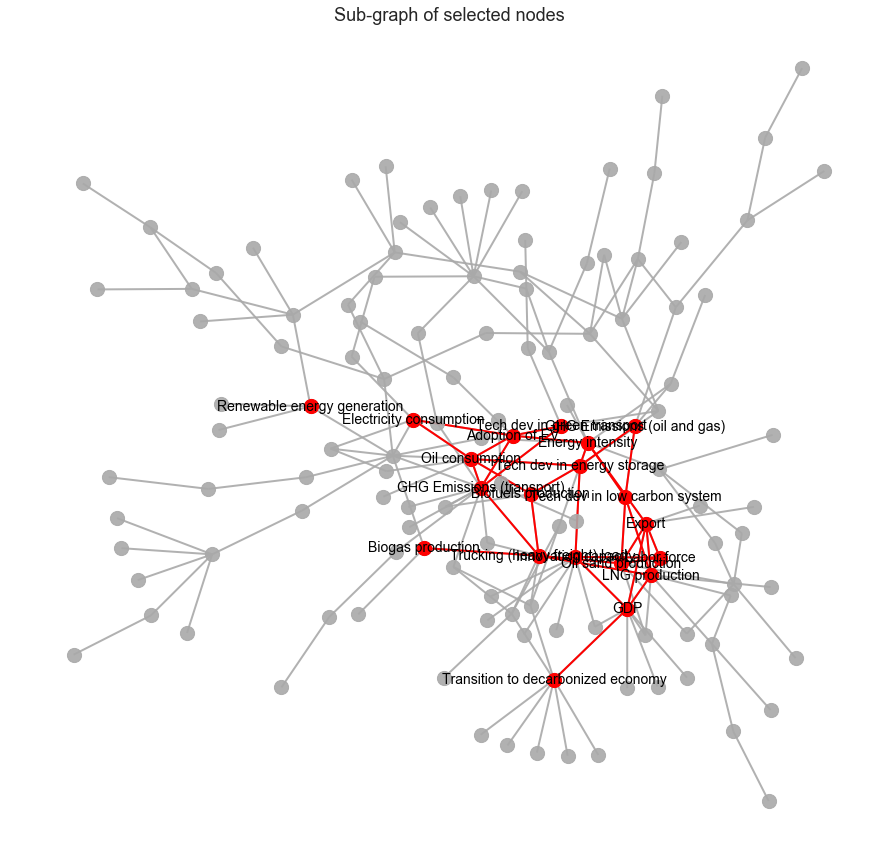

In [23]:
plt.figure(figsize=(15,15))
layout = nx.kamada_kawai_layout(GSE5)
set_style('white')

plt.subplot(111)
plt.axis('off')
plt.title('Sub-graph of selected nodes',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgrey', node_size=200, alpha = 0.9)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2, alpha = 0.9)
nx.draw_networkx_nodes(H, layout, node_color='r', node_size=200, edgecolors='r', alpha=1)
nx.draw_networkx_edges(H, layout, edge_color='r',width=2)
nx.draw_networkx_labels(H, layout, font_size=14, font_color='k')

plt.savefig('./figures/subgraph_selectednodes.pdf')

## Section 4: Communities detections

## Louvain method
Below is the code for detecting community using Louvain method

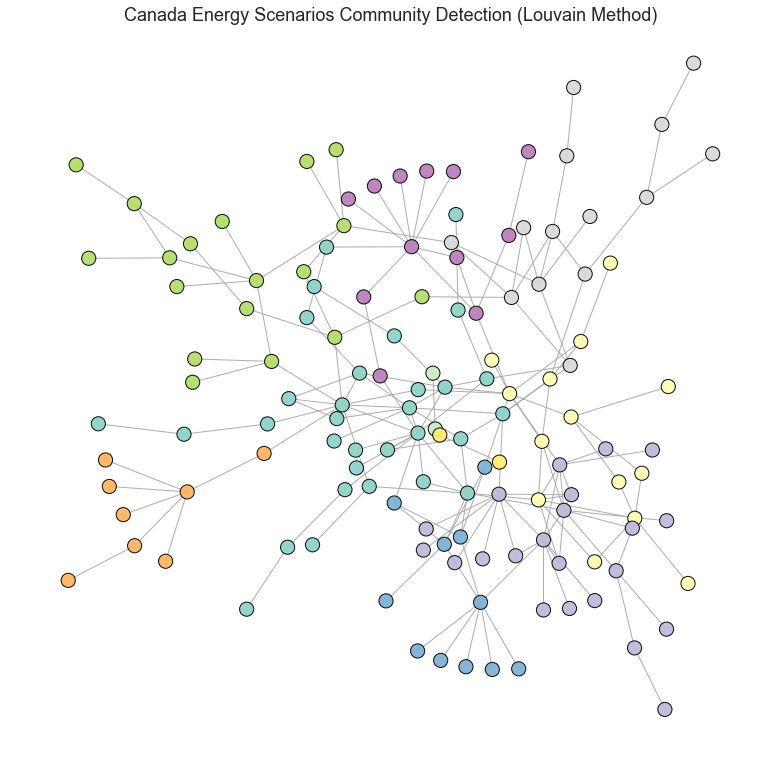

In [24]:
colors = [partition_ca[n] for n in GSE4.nodes()]
my_colors = plt.cm.Set3 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html

layout = nx.kamada_kawai_layout(GSE5)
plt.figure(figsize=(10,10))
nx.draw(GSE4, layout, edge_color = "darkgrey", node_color=colors, cmap = my_colors, with_labels = False, node_size = 200, edgecolors='k', alpha = .95)

plt.title('Canada Energy Scenarios Community Detection (Louvain Method)',fontsize=18)

plt.savefig('./figures/community-ca.pdf')
plt.savefig('./figures/Community-ca.png')

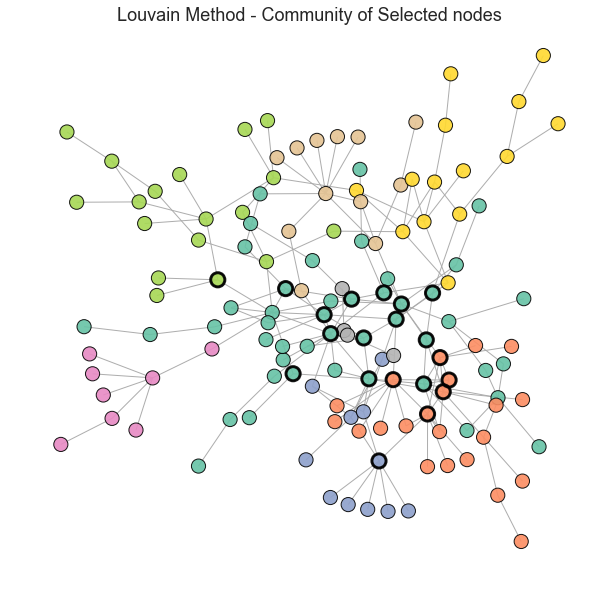

In [25]:
colors = [partition_ca[n] for n in GSE4.nodes()]
my_colors = plt.cm.Set2 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html

layout = nx.kamada_kawai_layout(GSE5)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Louvain Method - Community of Selected nodes',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color=colors, cmap = my_colors, node_size = 200, edgecolors='k', alpha = .9)
nx.draw_networkx_edges(GSE4, layout, edge_color = "darkgrey", alpha = .95)
nx.draw_networkx_nodes(GSE4, layout, nodelist=select21_ls, node_color='None', node_size = 200, edgecolors='k', linewidths=3, alpha = .9)

plt.savefig('./figures/community_selectednodes.pdf')
plt.savefig('./figures/community_selectednodes.png')

## Group list
The community group list is already created under cent_df dataframe. I sort by community for better viewing

In [26]:
comm_sorted = cent_df.sort_values('Community',ascending=True)
cent_df.describe()

,Eigenvector,Betweenness,Community
count,1.340000e+02,134.000000,134.000000
mean,5.186806e-02,0.028455,3.097015
std,6.934172e-02,0.050554,2.566029
min,6.121546e-29,0.000000,0.000000
25%,4.195210e-03,0.000000,1.000000
50%,2.039179e-02,0.001955,2.500000
75%,6.664981e-02,0.040158,5.000000
max,3.441268e-01,0.339049,9.000000


The above describe method shows under the community the count as 131 (i.e. number of nodes) and the max as 9 (total number of groups). 

Subsequently, we will show the 9 groups and the membership of each group.

In [27]:
cent_df.loc[cent_df['Community'] == 0] # get the membership for community '0'

,Eigenvector,Betweenness,Community
Adoption of EV,0.231423,0.061744,0
Biofuels consumption,0.075663,0.000792,0
Biofuels consumption (Freight),0.066650,0.000000,0
Biofuels production,0.166175,0.011976,0
Biogas production,0.105396,0.052528,0
Blending target policy mandate,0.098835,0.000395,0
Electricity consumption,0.177240,0.034648,0
Electricity consumption (residential),0.036509,0.016528,0
Electrification of light freight transport,0.066650,0.000000,0
Electrification of rail transport,0.069353,0.028936,0


In [28]:
cent_df.loc[cent_df['Community'] == 1]

,Eigenvector,Betweenness,Community
Building retrofit incentives,0.009552,0.000000,1
Energy efficiency policy mandate,0.049318,0.037258,1
Energy intensity,0.204339,0.233946,1
Energy tech change (building),0.020371,0.001723,1
Energy tech change (transport),0.020371,0.001723,1
GHG Emissions (agriculture),0.011087,0.000000,1
GHG Emissions (oil and gas),0.080122,0.076248,1
GHG reduction target,0.057243,0.020911,1
LNG production (USA),0.010819,0.000000,1
Oil demand (global),0.047490,0.000000,1


In [29]:
cent_df.loc[cent_df['Community'] == 2]

,Eigenvector,Betweenness,Community
Developing countries GDP,0.039166,0.000000,2
Economic productivity,0.026342,0.000000,2
Educational attainment,0.026342,0.000000,2
Export,0.202214,0.078317,2
GDP,0.186280,0.088667,2
Gas-fired generation,0.002416,0.000000,2
Income per capita,0.062423,0.000000,2
Innovation capacity,0.136005,0.089807,2
LNG demand,0.012475,0.014582,2
LNG demand (USA),0.012007,0.000000,2


In [30]:
cent_df.loc[cent_df['Community'] == 3]

,Eigenvector,Betweenness,Community
Agricultural production,0.111460,0.041124,3
Biorefinery strategy,0.081088,0.019727,3
Biotech production,0.018702,0.000000,3
Feedstock (biofuel) supply,0.109016,0.020137,3
Fishery production,0.018702,0.000000,3
Food prices,0.021588,0.000000,3
Forest production,0.107279,0.026542,3
High-tech manufacturing production,0.018702,0.000000,3
Sustainable social change,0.018702,0.000000,3
Transition to decarbonized economy,0.096558,0.076084,3


In [31]:
cent_df.loc[cent_df['Community'] == 4]

,Eigenvector,Betweenness,Community
Clean energy for indigenous community,0.002409,0.000000,4
Gov budget for energy transition,0.002503,0.014582,4
Institutions framework,0.002409,0.000000,4
Low carbon energy governance,0.012441,0.085669,4
Monitoring process,0.002409,0.000000,4
Multilevel governance,0.002409,0.000000,4
Sectoral coordination,0.052094,0.097289,4
Tech dev in green transport (rail),0.000485,0.000000,4


In [32]:
cent_df.loc[cent_df['Community'] == 5]

,Eigenvector,Betweenness,Community
Electricity generation,0.007690,0.045796,5
Electrification policy,0.001489,0.000000,5
Employment for indigenous communities,0.010976,0.000000,5
Environmental impacts,0.003064,0.031100,5
GHG Emissions (electricity),0.057390,0.082190,5
Geographic availability,0.001489,0.000000,5
Harmonize elect generation load profile,0.000215,0.000000,5
Hydro electric generation,0.011592,0.026107,5
Inter-province HV infrastructure,0.001112,0.016044,5
Inter-province electricity trade,0.002460,0.013310,5


In [33]:
cent_df.loc[cent_df['Community'] == 6]

,Eigenvector,Betweenness,Community
Carbon sink,0.000153,0.000000,6
Community-owned energy system,0.012635,0.044302,6
District cooling/heating,0.000761,0.000000,6
Energy production cost,0.010005,0.028247,6
Enterprenuership in private sector,0.000492,0.000000,6
GHG Emissions (building),0.003927,0.043290,6
Innovation capacity (global),0.072534,0.082582,6
Large-scale hydropower construction,0.008515,0.000243,6
Solar power generation,0.004041,0.000000,6
Solar power production cost,0.020865,0.044722,6


In [34]:
cent_df.loc[cent_df['Community'] == 7]

,Eigenvector,Betweenness,Community
Active mobility,0.048277,0.102942,7
Banning coal/oil-fired generation,0.001882,0.000000,7
Carbon intensity,0.009715,0.014582,7
Distance travel,0.017770,0.019115,7
Energy consumption,0.021660,0.082959,7
House size,0.004195,0.000000,7
Number of passenger per vehicle,0.004195,0.000000,7
Number of people per household,0.004195,0.000000,7
Road speed limit,0.004195,0.000000,7
Shared mobility,0.070092,0.028400,7


In [35]:
cent_df.loc[cent_df['Community'] == 8]

,Eigenvector,Betweenness,Community
Climate change,6.121546e-29,0.0,8
Loss of biodiversity,6.121546e-29,0.0,8


In [36]:
cent_df.loc[cent_df['Community'] == 9]

,Eigenvector,Betweenness,Community
Partnership with automotive industry,6.121546e-29,0.0,9
Tech dev in green transport (freight),6.121546e-29,0.0,9


In [37]:
def adjust_grpos(grp,x,y): #Not used anymore
    scalingX = x
    scalingY = y
    step = 0
    for l in grp:
        count = 0
        for s in l:
            if count == 0:
                x = s + scalingX
                count=count+1
            else:
                y = s + scalingY
        grp[step] = [x,y]
        step = step+1
    return

def lst_to_area(grp, pos): # grp is the group of the communities, pos is the networkx layout
    grp_area = []
    for n in grp:
        grp_area.append(pos[n])
    return grp_area

def labelanywhere(string_text,xy_loc,xy_text,myfontsize): # for printing text label annotations (arrow)
    plt.annotate(string_text,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.02, width=0.5),
        xytext=xy_text, fontsize=myfontsize)

In [73]:
colors = [partition_ca[n] for n in GSE4.nodes()]
my_colors = plt.cm.Set3 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html
my_fontsize = 14
layout = nx.spring_layout(GSE4, random_state=8)

"""Manually adjust layout position"""
# Move group 0 in turquiose
checklist = [n for n in partition_ca if partition_ca[n]==0]
for n in checklist:
    layout[n] = layout[n] + ([-0.0,-0.20])

# Move group 1 light beige
checklist = [n for n in partition_ca if partition_ca[n]==1]
for n in checklist:
    layout[n] = layout[n] + ([-0.2,0.3])
    
# Move group 2 light purple
checklist = [n for n in partition_ca if partition_ca[n]==2]
for n in checklist:
    layout[n] = layout[n] + ([-0.50,0.2])

# Move group 3 in blue
checklist = [n for n in partition_ca if partition_ca[n]==3]
for n in checklist:
    layout[n] = layout[n] + ([0.0,-0.5])

# Move group 4 in orange
checklist = [n for n in partition_ca if partition_ca[n]==4]
for n in checklist:
    layout[n] = layout[n] + ([0.23,-0.1])

# Move group 5 in green
checklist = [n for n in partition_ca if partition_ca[n]==5]
for n in checklist:
    layout[n] = layout[n] + ([0.0,0.33])

# Move group 6 in light grey
checklist = [n for n in partition_ca if partition_ca[n]==6]
for n in checklist:
    layout[n] = layout[n] + ([0.2,-0.2])

# Move group 7 in purple
checklist = [n for n in partition_ca if partition_ca[n]==7]
for n in checklist:
    layout[n] = layout[n] + ([-0.3,-0.22])
    
# Move group 8 in light green
checklist = [n for n in partition_ca if partition_ca[n]==8]
for n in checklist:
    layout[n] = layout[n] + ([0.419,0.0])

# Move group 9 in yellow
checklist = [n for n in partition_ca if partition_ca[n]==9]
for n in checklist:
    layout[n] = layout[n] + ([-0.315,0.309])


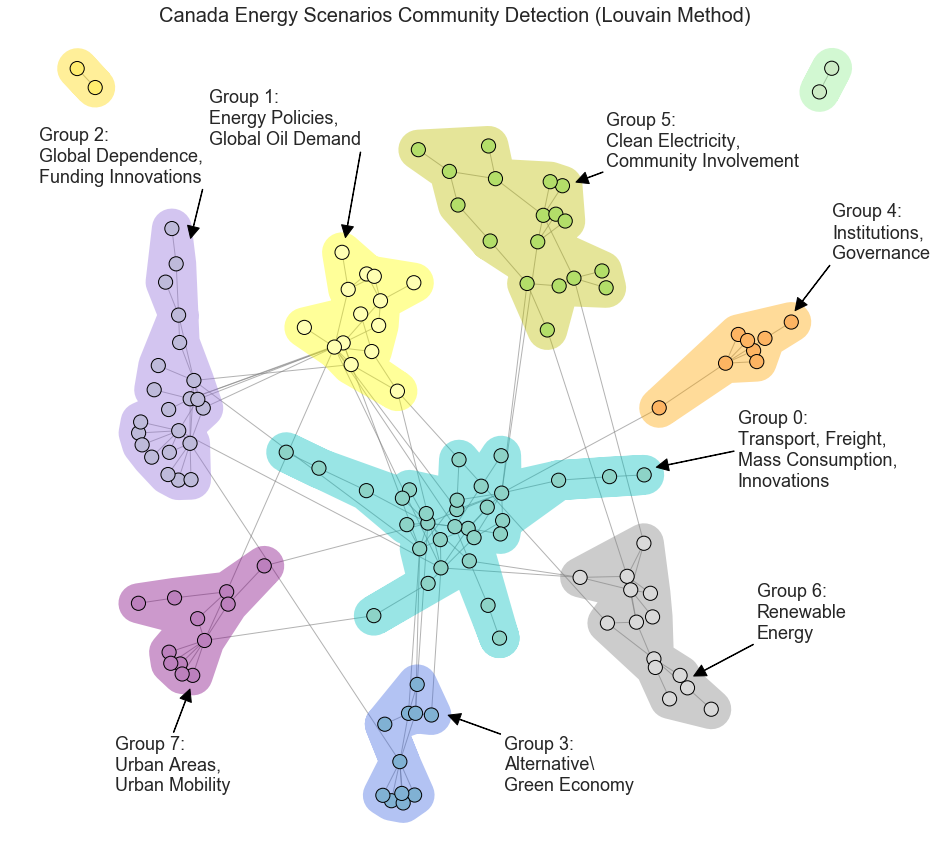

In [79]:
# Create polygon patches for each groups
grp0_lst = ['Trucking (heavy freight) load','Electricity consumption (residential)',
            'Use of electrical appliances','Tech dev in green transport',
            'Regulatory standard for green transport','Emerging green transport businesses',
            'Regulatory standard for green transport','Oil consumption',
            'Biofuels consumption','LNG consumption','Management of natural resources',
            'Indigenous knowledge','Energy studies scholarship','Management of natural resources',
            'GHG Emissions (aggregate)','Transport modal shift','Energy intensity (transport)',
            'Waste to energy tech dev','Biogas production','Biofuels consumption (Freight)',
            'Electrification of light freight transport','Intercity (people) mobility',
            'Rail infrastructure','Electrification of rail transport','Freight (trade) volume',
            'Health issues for indigenous communities','Blending target policy mandate',
            'Tech dev in green transport']
grp0_area = lst_to_area(grp0_lst, layout)
grp0 = Polygon(grp0_area,closed=True, fill=False,ec='c',joinstyle='round',lw=40,alpha=0.4)

grp1_lst = ['Building retrofit incentives','Energy efficiency policy mandate',
            'GHG Emissions (agriculture)','Tech dev in artifical intelligence',
            'GHG Emissions (oil and gas)','Tech dev in low carbon system','Energy intensity',
            'GHG reduction target','Oil demand (global)','Oil prices (global)',
            'LNG production (USA)','Energy tech change (building)','Energy tech change (transport)']
grp1_area = lst_to_area(grp1_lst, layout)
grp1 = Polygon(grp1_area,closed=True, fill=False,ec='yellow',joinstyle='round',lw=40,alpha=0.4)

grp2_lst = ['LNG demand (global)','Developing countries GDP','Rise of China and Asia',
            'R&D funding from government','Tech dev in energy efficiency','Educational attainment',
            'Economic productivity','LNG infrastructures development','Population',
            'Oil infrastructures development','GDP','Innovation capacity','USA Economy',
            'LNG production','LNG prices (global)','LNG demand','Gas-fired generation',
            'LNG demand (USA)','LNG demand (USA/Canada)']
grp2_area = lst_to_area(grp2_lst, layout)
grp2 = Polygon(grp2_area,closed=True, fill=False,ec='mediumpurple',joinstyle='round',lw=40,alpha=0.4)

grp3_lst = ['Feedstock (biofuel) supply','Biorefinery strategy',
            'Forest production','Food prices','Transition to decarbonized economy',
            'Fishery production','Biotech production','High-tech manufacturing production',
            'Sustainable social change','Transition to decarbonized economy','Food prices']
grp3_area = lst_to_area(grp3_lst, layout)
grp3 = Polygon(grp3_area,closed=True, fill=False,ec='royalblue',joinstyle='round',lw=40,alpha=0.4)

grp4_lst = ['Tech dev in green transport (rail)','Gov budget for energy transition',
            'Multilevel governance','Low carbon energy governance','Sectoral coordination',
            'Institutions framework']
grp4_area = lst_to_area(grp4_lst, layout)
grp4 = Polygon(grp4_area,closed=True, fill=False,ec='orange',joinstyle='round',lw=40,alpha=0.4)

grp5_lst = ['Wind power generation','New clean tech generation','Geographic availability',
            'Electrification policy','Renewable energy generation',
            'Employment for indigenous communities','Participatory planning',
            'Participatory visioning','Environmental impacts','Road infrastructure',
            'Harmonize elect generation load profile','Inter-province HV infrastructure',
            'Inter-province electricity trade','Hydro electric generation','Environmental impacts',
            'Inter-province HV infrastructure','Social acceptance','Hydro electric generation',
            'New clean tech generation','GHG Emissions (electricity)','GHG Emissions (electricity)']
grp5_area = lst_to_area(grp5_lst, layout)
grp5 = Polygon(grp5_area,closed=True, fill=False,ec='y',joinstyle='round',lw=40,alpha=0.4)

grp6_lst = ['Energy production cost','Large-scale hydropower construction','Solar power generation',
            'GHG Emissions (building)','District cooling/heating',
            'Wooden buildings','Carbon sink','Enterprenuership in private sector',
            'Tech investment','Tech dev in renewable energy','Solar power production cost',
            'Innovation capacity (global)']
grp6_area = lst_to_area(grp6_lst, layout)
grp6 = Polygon(grp6_area,closed=True, fill=False,ec='grey',joinstyle='round',lw=40,alpha=0.4)

grp7_lst = ['Shared mobility','Active mobility','Carbon intensity',
            'Banning coal/oil-fired generation','Urban green infrastructure',
            'House size','Urbanization','Number of passenger per vehicle',
            'Road speed limit','Energy consumption','Distance travel']
grp7_area = lst_to_area(grp7_lst, layout)
grp7 = Polygon(grp7_area,closed=True, fill=False,ec='purple',joinstyle='round',lw=40,alpha=0.4)

grp8_lst = ['Climate change','Loss of biodiversity']
grp8_area = lst_to_area(grp8_lst, layout)
grp8_area.append(grp8_area[0]+[0.001,0.001])
grp8 = Polygon(grp8_area,closed=True,fill=False,ec='lightgreen',joinstyle='round',lw=40,alpha=0.4)

grp9_lst = ['Partnership with automotive industry','Tech dev in green transport (freight)']
grp9_area = lst_to_area(grp9_lst, layout)
grp9_area.append(grp9_area[0]+[0.001,0.001])
grp9 = Polygon(grp9_area,closed=True,fill=False,ec='gold',joinstyle='round',lw=40,alpha=0.4)

plt.figure(figsize=(15,15))
plt.axis('off')
plt.title('Canada Energy Scenarios Community Detection (Louvain Method)',fontsize=20)

nx.draw_networkx_nodes(GSE4, layout, node_size=200, node_color=colors, cmap = my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=1, alpha=0.6)

plt.gca().add_patch(grp0)
plt.gca().add_patch(grp1)
plt.gca().add_patch(grp2)
plt.gca().add_patch(grp3)
plt.gca().add_patch(grp4)
plt.gca().add_patch(grp5)
plt.gca().add_patch(grp6)
plt.gca().add_patch(grp7)
plt.gca().add_patch(grp8)
plt.gca().add_patch(grp9)

#noteLabel('Blending target policy mandate', (-0.8,-0.2), my_fontsize)
#noteLabel('Emerging green transport businesses', (-0.8,-0.75), my_fontsize)
#noteLabel('Health issues for indigenous communities', (-0.8,-0.8), my_fontsize)
#noteLabel('Tech dev in green transport', (-0.8,-0.35), my_fontsize)
#noteLabel('Tech dev in energy storage', (-0.5,-0.85), my_fontsize)

labelanywhere('Group 0:\nTransport, Freight,\nMass Consumption,\nInnovations',(0.53,-0.05),(0.75,-0.1),18)
labelanywhere('Group 1:\nEnergy Policies,\nGlobal Oil Demand',(-0.29,0.55),(-0.65,0.8),18)
labelanywhere('Group 2:\nGlobal Dependence,\nFunding Innovations',(-0.7,0.55),(-1.1,0.7),18)
labelanywhere('Group 3:\nAlternative\ \nGreen Economy',(-0.02,-0.7),(0.13,-0.9),18)
labelanywhere('Group 4:\nInstitutions,\nGovernance',(0.9,0.36),(1,0.5),18)
labelanywhere('Group 5:\nClean Electricity,\nCommunity Involvement',(0.32,0.7),(0.4,0.74),18)
labelanywhere('Group 6:\nRenewable\nEnergy',(0.63,-0.6),(0.8,-0.5),18)
labelanywhere('Group 7:\nUrban Areas,\nUrban Mobility',(-0.7,-0.63),(-0.9,-0.9),18)

plt.savefig('./figures/ca_community_1.pdf')
plt.savefig('./figures/ca_community_1.png')

In [77]:
# Codes for checking the group membership 
group = 0
checklist = [n for n in partition_ca if partition_ca[n]==group]
for n in checklist:
    print (n, layout[n])

Oil consumption [ 0.03601548 -0.20991244]
GHG Emissions (aggregate) [ 0.12476434 -0.11715585]
LNG consumption [ 0.12728111 -0.18948254]
Electricity consumption [ 0.05166246 -0.23424919]
Biofuels consumption [ 0.1215035  -0.22456107]
Freight (trade) volume [-0.12647464 -0.20008126]
GHG Emissions (transport) [-0.07074298 -0.19597994]
Biofuels production [-0.03773886 -0.23946028]
Adoption of EV [ 0.00083633 -0.20532373]
Use of electrical appliances [-0.21385649 -0.43938757]
Electricity consumption (residential) [-0.07006671 -0.35457095]
Biofuels consumption (Freight) [-0.11938093 -0.10860748]
Electrification of rail transport [-0.23355781 -0.11063766]
Fuel switching [ 0.00591472 -0.16041883]
Tech dev in energy storage [-0.03606116 -0.31378169]
Tech dev in green transport [ 0.03911304 -0.29548246]
Transport modal shift [ 0.12331668 -0.01884616]
Energy intensity (transport) [ 0.07056332 -0.0990164 ]
Electrification of light freight transport [-0.13815324 -0.13044364]
Blending target policy 

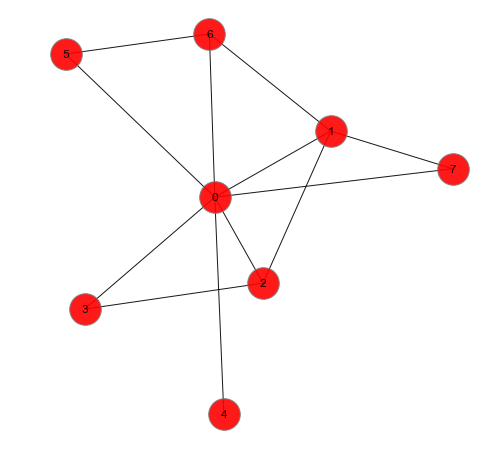

In [41]:
# See how each group connects to each other and understand which group in significant
Gca_Grp = nx.Graph()
Gca_Grp.add_edges_from([('0','1'),('0','2'),('0','3'),('0','4'),('0','5'),('0','6'),('0','7'),
    ('1','2'),('1','6'),('1','7'),('2','3'),('5','6')])

plt.figure(figsize=(8,8))
plt.axis('off')
pos = nx.spring_layout(Gca_Grp, random_state=26)
nx.draw(Gca_Grp, pos, edge_color = "k", node_color='r', with_labels = True, node_size = 1000, edgecolors='grey', alpha = .9)

# Community Detection for WEC

In [42]:
partition_world = community.best_partition(GSE_wec, randomize=False)
wec_communitydf = pd.DataFrame.from_dict([partition_world])
wec_communitydf = pd.DataFrame.transpose(wec_communitydf)
wec_communitydf.columns = ['Community']

wec_communitydf.describe() # Count is the number of nodes, max is the total number of communities

,Community
count,51.000000
mean,2.764706
std,1.761684
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,6.000000


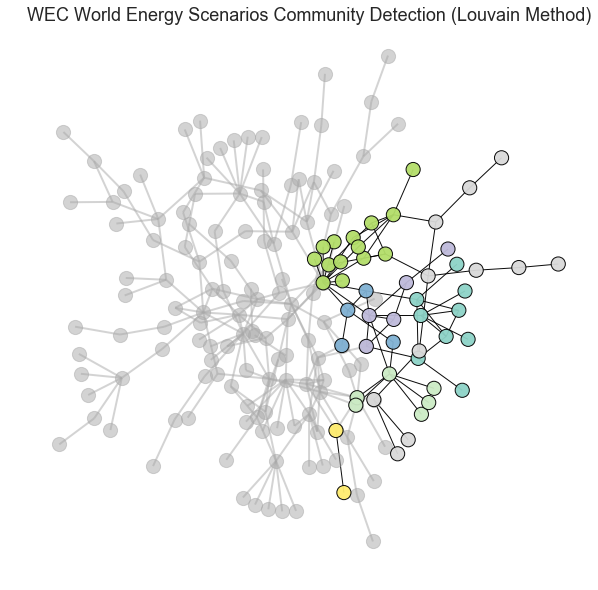

In [43]:
colors = [partition_world[n] for n in GSE_wec.nodes()]
my_colors = plt.cm.Set3 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html

layout = nx.kamada_kawai_layout(GSE5)
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgrey', node_size=200, alpha = 0.5)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2, alpha = 0.5)
nx.draw(GSE_wec, layout, edge_color = "k", node_color=colors, cmap = my_colors, with_labels = False, node_size = 200, edgecolors='k', alpha = .95)

plt.title('WEC World Energy Scenarios Community Detection (Louvain Method)',fontsize=18)

plt.savefig('./figures/WEC_community.pdf')
plt.savefig('./figures/WEC_community.png')

In [44]:
wec_communitydf.loc[wec_communitydf['Community'] == 0]

,Community
Economic investment (global),0
Educational attainment (global),0
Energy demand (global),0
Energy intensity (global),0
Energy value chain (global),0
Growing middle class (global),0
Labor force (global),0
Mass consumption (global),0
Population (global),0


In [45]:
wec_communitydf.loc[wec_communitydf['Community'] == 1]

,Community
Energy production cost (global),1
GDP (global),1
Rate of energy tech change (global),1
Rise of China and Asia,1
Tech investment (global),1


In [46]:
wec_communitydf.loc[wec_communitydf['Community'] == 2]

,Community
Developing countries GDP,2
Economic productivity (global),2
Globalization,2
Tech dev in ICT (global),2


In [47]:
wec_communitydf.loc[wec_communitydf['Community'] == 3]

,Community
Carbon intensity (global),3
Electrification of rail transport (global),3
Environmental consciousness (global),3
GHG reduction target,3
Global environmental institution,3
Innovation capacity (global),3
Tech dev in articifical intelligence (global),3
Tech dev in data analytics (global),3
Tech dev in energy efficiency (global),3
Tech dev in energy storage (global),3


In [48]:
wec_communitydf.loc[wec_communitydf['Community'] == 4]

,Community
Adoption of EV (global),4
Electricity demand (global),4
Fuel switching (global),4
GHG Emissions (global),4
Gasification of heavy freight transport (global),4
Gasification of marine feeder transport (global),4
Health risk awareness (global),4
LNG demand (global),4
Nuclear power generation (global),4
Renewable energy generation (global),4


In [49]:
wec_communitydf.loc[wec_communitydf['Community'] == 5]

,Community
Geopolitical tensions,5
Global institutions,5
LNG prices (global),5
Oil prices (global),5
Stability of Middle Eastern region,5
Technology transfer (global),5


In [50]:
wec_communitydf.loc[wec_communitydf['Community'] == 6]

,Community
Oil demand (global),6
Oil production (global),6


In [51]:
WEC_deg = nx.degree_centrality(GSE_wec)
WEC_eig = nx.eigenvector_centrality(GSE_wec)
WEC_bet = nx.betweenness_centrality(GSE_wec)
WEC_clo = nx.closeness_centrality(GSE_wec)
WEC_pgr = nx.pagerank(GSE_wec)

In [52]:
WEC_df = pd.DataFrame.from_dict([WEC_eig, WEC_bet, WEC_deg, WEC_clo, WEC_pgr, partition_world])
WEC_df = pd.DataFrame.transpose(WEC_df)
WEC_df.columns = ['Eigenvector', 'Betweenness', 'Degree', 'Closeness', 'Pagerank', 'Community']
WEC_df['Community'] = WEC_df['Community'].astype(int)
WEC_df.to_csv('./data/wec_centralities.csv')

In [53]:
# Take a look what's inside the dataframe
WEC_df.sort_values('Betweenness',ascending=False).head(10)

,Eigenvector,Betweenness,Degree,Closeness,Pagerank,Community
Innovation capacity (global),0.488128,0.564218,0.22,0.351756,0.075298,3
GDP (global),0.398731,0.420272,0.14,0.329143,0.044418,1
Tech dev in low carbon system (global),0.172471,0.299864,0.06,0.315616,0.020394,3
Carbon intensity (global),0.072755,0.248571,0.08,0.271059,0.027383,3
GHG Emissions (global),0.033341,0.247755,0.08,0.238756,0.030785,4
Geopolitical tensions,0.169452,0.191837,0.14,0.266358,0.057081,5
Environmental consciousness (global),0.152184,0.160272,0.12,0.271059,0.041053,3
Economic productivity (global),0.315513,0.116735,0.08,0.309262,0.025732,2
Energy demand (global),0.185625,0.113333,0.10,0.263314,0.034206,0
Fuel switching (global),0.008637,0.110204,0.04,0.196923,0.018005,4


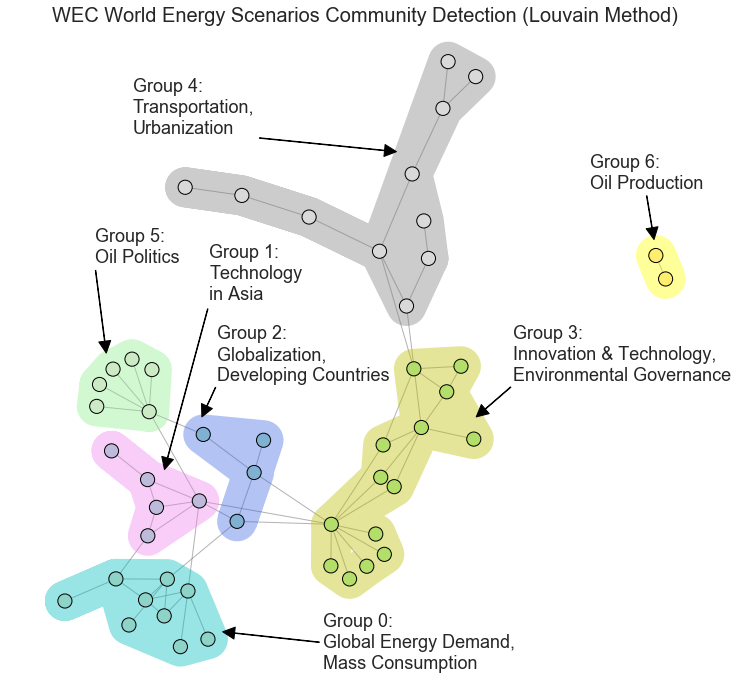

In [71]:
weceig_size = [100+1000*WEC_eig[n] for n in GSE_wec.nodes()] #For showing diff node size (not used)
wecbet_size = [100+1000*WEC_bet[n] for n in GSE_wec.nodes()] #For showing diff node size (not used)

my_fontsize = 12
colors = [partition_world[n] for n in GSE_wec.nodes()]
my_colors = plt.cm.Set3 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html
layout = nx.spring_layout(GSE_wec, random_state=26)

# Move group 3 in green
checklist = [n for n in partition_world if partition_world[n]==3]
for n in checklist:
    layout[n] = layout[n] + ([0.05,-0.1])

# Create polygon patches for each groups
grp0_lst = ['Energy intensity (global)','Growing middle class (global)',
            'Educational attainment (global)','Economic investment (global)',
            'Energy value chain (global)','Energy demand (global)',
            'Labor force (global)','Growing middle class (global)',
            'Mass consumption (global)','Growing middle class (global)']
grp0_area = lst_to_area(grp0_lst, layout)
grp0 = Polygon(grp0_area, closed=True, fill=False, ec='c',joinstyle='round',lw=40,alpha=0.4)

grp1_lst = ['Energy production cost (global)','Rate of energy tech change (global)',
            'Tech investment (global)','Rise of China and Asia','GDP (global)',
            'Rate of energy tech change (global)']
grp1_area = lst_to_area(grp1_lst, layout)
grp1 = Polygon(grp1_area, closed=True, fill=False, ec='violet',joinstyle='round',lw=40,alpha=0.4)

grp2_lst = ['Globalization','Tech dev in ICT (global)',
            'Economic productivity (global)','Developing countries GDP',
            'Globalization']
grp2_area = lst_to_area(grp2_lst, layout)
grp2 = Polygon(grp2_area, closed=True, fill=False, ec='royalblue',joinstyle='round',lw=40,alpha=0.4)

grp3_lst = ['Innovation capacity (global)','Tech dev in data analytics (global)',
            'Tech dev in articifical intelligence (global)','Tech dev in machine learning (global)',
            'Tech dev in renewable energy (global)','Tech dev in energy storage (global)',
            'Innovation capacity (global)','Tech dev in energy efficiency (global)',
            'Environmental consciousness (global)','Electrification of rail transport (global)',
            'Global environmental institution','GHG reduction target',
            'Carbon intensity (global)','Environmental consciousness (global)',
            'Tech dev in low carbon system (global)','Tech dev in green transport (global)',
            'Innovation capacity (global)']
grp3_area = lst_to_area(grp3_lst, layout)
grp3 = Polygon(grp3_area, closed=True, fill=False, ec='y',joinstyle='round',lw=40,alpha=0.4)

grp4_lst = ['GHG Emissions (global)','Renewable energy generation (global)',
           'Health risk awareness (global)','Nuclear power generation (global)',
           'Health risk awareness (global)','Renewable energy generation (global)',
           'GHG Emissions (global)','Adoption of EV (global)',
           'Electricity demand (global)','GHG Emissions (global)',
            'Electricity demand (global)','Urbanization (global)',
           'Fuel switching (global)','LNG demand (global)',
           'Gasification of marine feeder transport (global)',
           'Gasification of heavy freight transport (global)']
grp4_area = lst_to_area(grp4_lst, layout)
grp4 = Polygon(grp4_area, closed=True, fill=False, ec='grey',joinstyle='round',lw=40,alpha=0.4)

grp5_lst = ['Geopolitical tensions','Technology transfer (global)',
            'LNG prices (global)','Geopolitical tensions',
            'LNG prices (global)','Oil prices (global)',
            'Global institutions','Stability of Middle Eastern region']
grp5_area = lst_to_area(grp5_lst, layout)
grp5 = Polygon(grp5_area, closed=True, fill=False, ec='lightgreen',joinstyle='round',lw=40,alpha=0.4)

grp6_lst = ['Oil production (global)','Oil demand (global)']
grp6_area = lst_to_area(grp6_lst, layout)
grp6_area.append(grp6_area[0]+[0.001,0.001])
grp6 = Polygon(grp6_area, closed=True, fill=False, ec='yellow',joinstyle='round',lw=40,alpha=0.4)

plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx_nodes(GSE_wec, layout, node_size=200, node_color=colors, cmap = my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE_wec, layout, edge_color='grey',width=1, alpha=0.6)

#Label indiviual node as needed (not used)
#noteLabel('Innovation capacity (global)', (0.5,-0.3), my_fontsize)
#noteLabel('GDP (global)', (0.5,-0.25), my_fontsize)
#noteLabel('Tech dev in low carbon system (global)', (-0.8,0.4), my_fontsize)
#noteLabel('Carbon intensity (global)', (-0.6,0.5), my_fontsize)

# Plot all the patches
plt.gca().add_patch(grp0)
plt.gca().add_patch(grp1)
plt.gca().add_patch(grp2)
plt.gca().add_patch(grp3)
plt.gca().add_patch(grp4)
plt.gca().add_patch(grp5)
plt.gca().add_patch(grp6)

labelanywhere('Group 0:\nGlobal Energy Demand,\nMass Consumption',(-0.17,-0.6),(0.1,-0.7),18)
labelanywhere('Group 1:\nTechnology\nin Asia',(-0.32,-0.17),(-0.2,0.3),18)
labelanywhere('Group 2:\nGlobalization,\nDeveloping Countries',(-0.22,-0.02),(-0.18,0.08),18)
labelanywhere('Group 3:\nInnovation & Technology,\nEnvironmental Governance',(0.5,-0.02),(0.6,0.08),18)
labelanywhere('Group 4:\nTransportation,\nUrbanization',(0.3,0.7),(-0.4,0.75),18)
labelanywhere('Group 5:\nOil Politics',(-0.47,0.15),(-0.5,0.4),18)
labelanywhere('Group 6:\nOil Production',(0.97,0.46),(0.8,0.6),18)

plt.title('WEC World Energy Scenarios Community Detection (Louvain Method)',fontsize=20)

plt.savefig('./figures/WEC_community_1.pdf')
plt.savefig('./figures/WEC_community_1.png')

In [59]:
# For checking group membership
group = 6
checklist = [n for n in partition_world if partition_world[n]==group]
for n in checklist:
    print (n, layout[n])

Oil production (global) [0.97438584 0.41936459]
Oil demand (global) [1.         0.35576565]


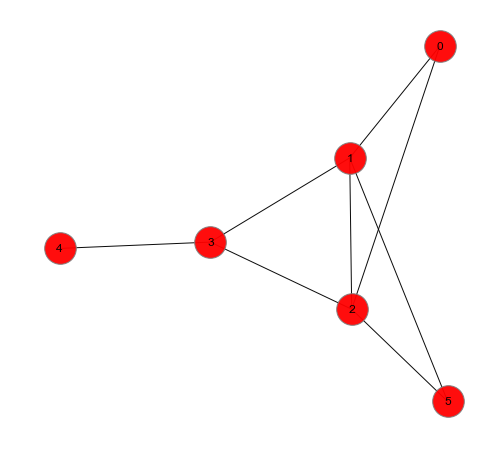

In [56]:
# See how each group connects to each other and understand which group in significant
GC_Grp = nx.Graph()
GC_Grp.add_edges_from([('0','1'),('0','2'),('1','2'),('1','3'),('1','5'),('2','3'),('2','5'),('3','4')])

plt.figure(figsize=(8,8))
plt.axis('off')
pos = nx.spring_layout(GC_Grp, random_state=26)
nx.draw(GC_Grp,pos,edge_color="k",node_color='r',with_labels=True,node_size=1000,edgecolors='grey',alpha=.95)